## 6.4 Supervised Machine Learning 

### The script contains:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### 5. Creating scatterplots and performin recression on the set without outliers.

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path = r'C:\Users\Lenovo\AirBnB Analysis\02 Data\Prepared Data'

In [7]:
df = pd.read_pickle(os.path.join(path, 'AirBnB_series_maps.pkl'))

### 2. Data cleaning


In [8]:
df.columns

Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'City', 'WeekTime', 'satisfaction',
       'price', 'eu_country'],
      dtype='object')

In [10]:
df.shape

(51707, 25)

In [11]:
# Renaming columns
df.rename(columns = {'realSum' : 'full_price', 'City': 'city', 'WeekTime': 'week_time', 'dist': 'distance_to_center', 'metro_dist': 'distance_to_metro', 'price' : 'price_level'}, inplace = True)

In [12]:
df.head()

,Unnamed: 0,full_price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,week_time,satisfaction,price_level,eu_country
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,...,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays,Very Satisfied,regular,Netherlands
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,...,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays,Satisfied,regular,Netherlands
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,...,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays,Satisfied,regular,Netherlands
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,...,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays,Very Satisfied,regular,Netherlands
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,...,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays,Very Satisfied,regular,Netherlands


In [13]:
# Checking for missing values

df.isnull().sum()

Unnamed: 0                    0
full_price                    0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
distance_to_center            0
distance_to_metro             0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
city                          0
week_time                     0
satisfaction                  0
price_level                   0
eu_country                    0
dtype: int64

In [14]:
# Checking for duplicates
dups = df.duplicated()

In [16]:
dups.shape

(51707,)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1412\1532317946.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['full_price'], bins=25) # Shows extreme values


<Axes: xlabel='full_price', ylabel='Density'>

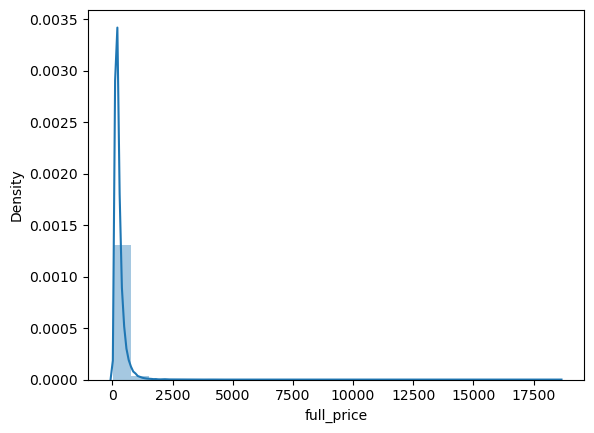

In [19]:
# Checking for extreme values
sns.distplot(df['full_price'], bins=25) # Shows extreme values

In [20]:
# Checking the mean
df['full_price'].mean() 

279.8795910937968

In [21]:
# Checking the median
df['full_price'].median() 

211.3430888246808

In [22]:
# Checking the max
df['full_price'].max() 

18545.450284723363

In [77]:
# Removing outliers
df_norm = df[df['full_price'] <=1500] 

In [78]:
df.shape

(51707, 25)

In [79]:
df_norm.shape

(51449, 25)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1412\4021477406.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_norm['full_price'], bins=25)


<Axes: xlabel='full_price', ylabel='Density'>

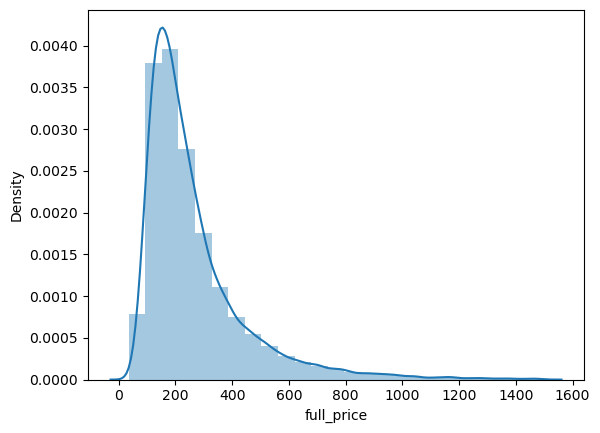

In [31]:
sns.distplot(df_norm['full_price'], bins=25)

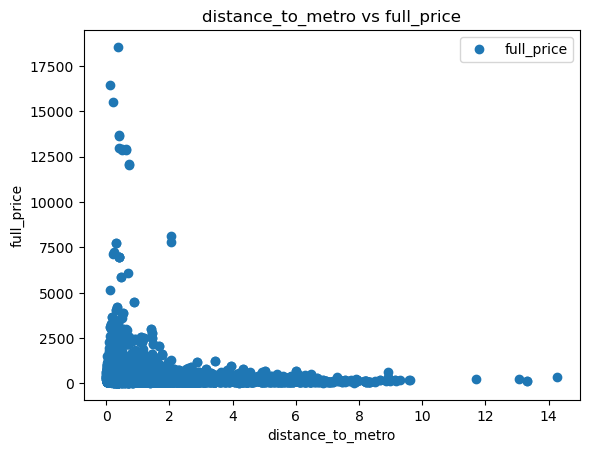

In [33]:
# Creating scatterplot using matplotlib on original set 

df.plot(x = 'distance_to_metro', y='full_price',style='o') 
plt.title('distance_to_metro vs full_price')  
plt.xlabel('distance_to_metro')  
plt.ylabel('full_price')  
plt.show()

Hypothesis: When the distance to metro grows, the price grows too. 

In [34]:
# Reshaping the variables into NumPy arrays and putting them into separate objects.

X = df['distance_to_metro'].values.reshape(-1,1)
y = df['full_price'].values.reshape(-1,1)

In [35]:
X

array([[2.53938   ],
       [0.23940392],
       [3.65162129],
       ...,
       [0.20253882],
       [0.28743468],
       [0.48090251]])

In [36]:
y

array([[194.03369812],
       [344.24577602],
       [264.10142245],
       ...,
       [637.16896898],
       [301.05415702],
       [133.23048875]])

In [37]:
# Splitting data into: training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [38]:
# Creating regression object

regression = LinearRegression() 

In [39]:
# Fitting regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [47]:
# Predicting the values of y using X (training set)

y_predicted_train = regression.predict(X_train)

In [48]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [49]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-22.97643101]]
Mean squared error:  104315.83082282306
R2 score:  0.0037598113375896247


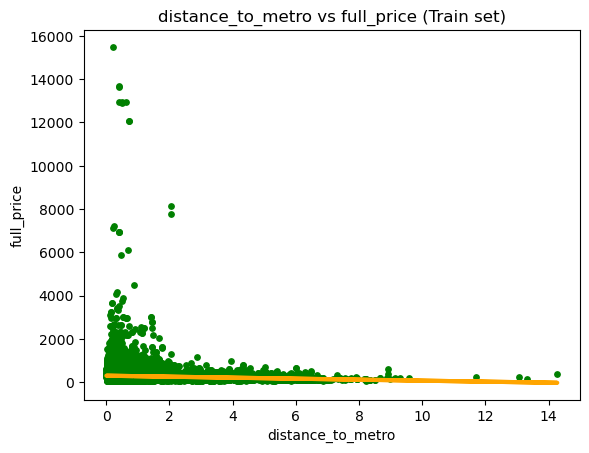

In [50]:
# Visualizing the training set results

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='orange', linewidth =3)
plot_test.title('distance_to_metro vs full_price (Train set)')
plot_test.xlabel('distance_to_metro')
plot_test.ylabel('full_price')
plot_test.show()

In [51]:
# Predicting the values of y using X

y_predicted = regression.predict(X_test)

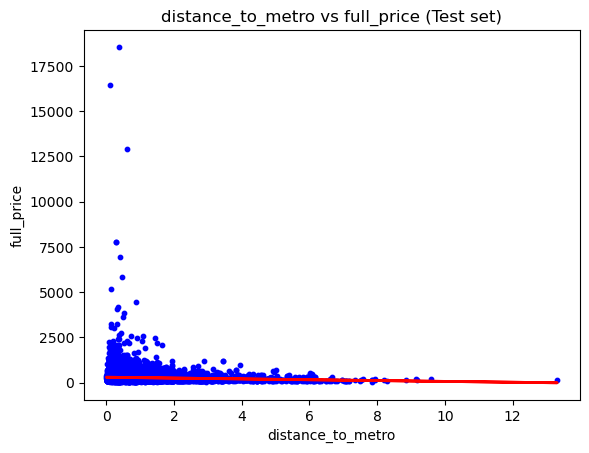

In [52]:
# Creating a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 10)
plot_test.plot(X_test, y_predicted, color='red', linewidth =2)
plot_test.title('distance_to_metro vs full_price (Test set)')
plot_test.xlabel('distance_to_metro')
plot_test.ylabel('full_price')
plot_test.show()

In [43]:
# Creating objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [44]:
# Showing model's summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-22.97643101]]
Mean squared error:  113754.66424966505
R2 score:  0.0036446575903975598


In [45]:
# Creating dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,125.268767,289.506730
1,156.874664,288.400216
2,310.834813,274.089606
3,142.994896,281.241026
4,225.754649,280.907459
5,150.743199,293.223048
6,150.743199,286.456299
7,325.498559,286.633344
8,382.141859,291.251806
9,173.880440,286.009132


Model does NOT fit well. Actually, with Slope:-22.97, MSE:113754.66 and R2 score:0.0036, the model it is proven to be very poor. It is pretty clear that linear regression is not the way to model here.  

### 5. Creating scatterplots and performin recression on the set without outliers.

In [116]:
# Removing outliers
df_no_out = df_norm[df['distance_to_metro'] <=6] 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1412\3095598284.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_out = df_norm[df['distance_to_metro'] <=6]


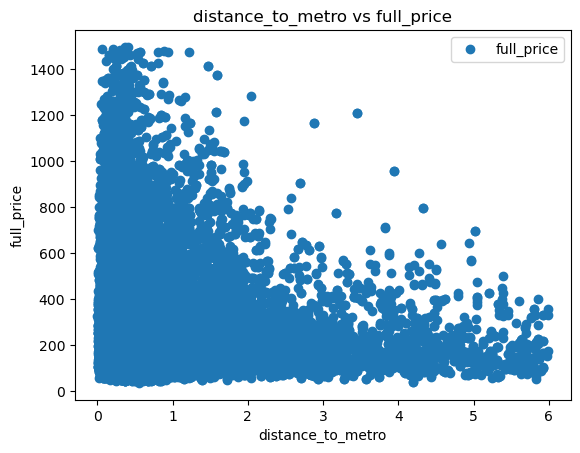

In [117]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_no_out.plot(x = 'distance_to_metro', y='full_price',style='o') 
plt.title('distance_to_metro vs full_price')  
plt.xlabel('distance_to_metro')  
plt.ylabel('full_price')  
plt.show()

Hypothesis: When the distance to metro grows, the price grows too. 

In [118]:
# Reshaping the variables into NumPy arrays and putting them into separate objects.

X = df_no_out['distance_to_metro'].values.reshape(-1,1)
y = df_no_out['full_price'].values.reshape(-1,1)

In [119]:
X

array([[2.53938   ],
       [0.23940392],
       [3.65162129],
       ...,
       [0.20253882],
       [0.28743468],
       [0.48090251]])

In [120]:
y

array([[194.03369812],
       [344.24577602],
       [264.10142245],
       ...,
       [637.16896898],
       [301.05415702],
       [133.23048875]])

In [121]:
# Splitting second dataseat into: training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [122]:
# Creating regression object

regression = LinearRegression() 

In [123]:
# Fitting regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [124]:
# Predicting the values of y using X (training set)

y_predicted_train = regression.predict(X_train)

In [125]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [126]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-21.61944594]]
Mean squared error:  33451.095019846514
R2 score:  0.007769195892131431


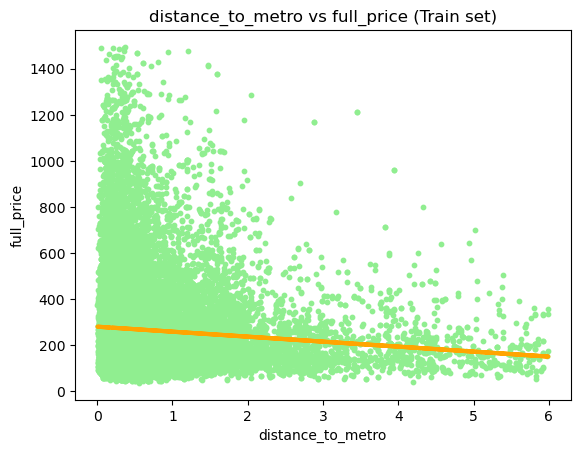

In [127]:
# Visualizing the training set results

plot_test = plt
plot_test.scatter(X_train, y_train, color='lightgreen', s = 10)
plot_test.plot(X_train, y_predicted_train, color='orange', linewidth =3)
plot_test.title('distance_to_metro vs full_price (Train set)')
plot_test.xlabel('distance_to_metro')
plot_test.ylabel('full_price')
plot_test.show()

In [128]:
# Predicting the values of y using X

y_predicted = regression.predict(X_test)

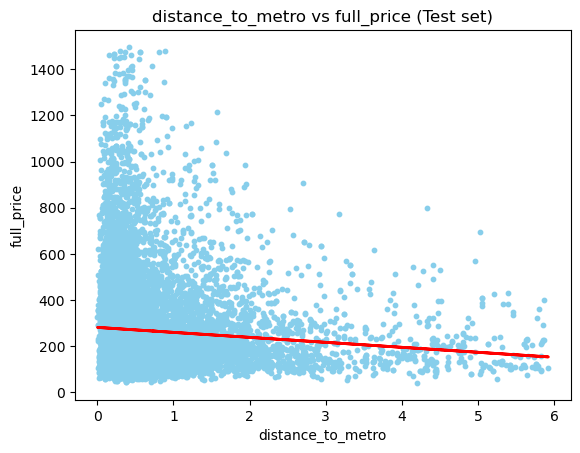

In [129]:
# Creating a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='skyblue', s = 10)
plot_test.plot(X_test, y_predicted, color='red', linewidth =2)
plot_test.title('distance_to_metro vs full_price (Test set)')
plot_test.xlabel('distance_to_metro')
plot_test.ylabel('full_price')
plot_test.show()

In [130]:
# Creating objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [131]:
# Showing model's summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-21.61944594]]
Mean squared error:  35518.081531700846
R2 score:  0.008017240345481014


In [132]:
# Creating dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,74.051508,263.196327
1,145.056593,271.614269
2,341.729580,269.192384
3,614.223134,278.776839
4,180.912979,273.486380
5,239.446529,274.710780
6,231.896329,227.214796
7,115.147812,264.936563
8,301.286234,278.368179
9,320.356473,257.781172


Model done on values without any outliers does NOT fit neither. Actually, with Slope:-21.61, MSE: 35518.08 and R2 score:0..0080, the model seems to fall very closely to the one done on full dataset. It is sure that linear regression is not the right way here.

Removing oulliers can potentially introduce the bias to the analysis. It this case dropping outliers did not remove significant amount of data and did not influence the result significantly. 

In [ ]:
df_noout.to_pickle(os.path.join(path,'AirBnB_regression.pkl'))